# Compute Results.ipynb
This notebook helps to calculate the per-class results for overleaf

In [1]:
import os
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score

In [2]:
# Dataset
TSV = r'C:\Users\ChenYi\Downloads\AAI3001_Project\labels\IEMOCAP_4.tsv'
AUDIO_DIRECTORY = r'C:\Users\ChenYi\Downloads\AAI3001_Project\small-project\IEMOCAP_full_release_audio'

# Contains the correct transcription provided by the IEMOCAP dataset
GROUND_TRUTH = './groundtruth_IEMOCAP.csv'

# Contains the correct emotions (A, H, S, N) remapped to positive, negative and neutral
REMAPPED_EMOTIONS = './sentiment_truths_IEMOCAP.csv'

# Filepaths
LOG_OUTPUT = './per-class-results.log'

PYTHON_SCRIPT = False

In [3]:
import logging
def get_logger(filename, verbosity=1, name=None):
    level_dict = {0: logging.DEBUG, 1: logging.INFO, 2: logging.WARNING}
    formatter = logging.Formatter("[%(asctime)s][%(filename)s][line:%(lineno)d][%(levelname)s] %(message)s")
    logger = logging.getLogger(name)
    logger.setLevel(level_dict[verbosity])

    fh = logging.FileHandler(filename, "w")
    fh.setFormatter(formatter)                                                                                                                                                                                     
    logger.addHandler(fh)                                                                                                                                                                                          
                                                                                                                                                                                                                   
    sh = logging.StreamHandler()                                                                                                                                                                                   
    sh.setFormatter(formatter)                                                                                                                                                                                     
    logger.addHandler(sh)                                                                                                                                                                                          
                                                                                                                                                                                                                   
    return logger
logger = get_logger(LOG_OUTPUT)

## Setup Global Variables

In [4]:
all_positive_accuracy = []
all_neutral_accuracy = []
all_negative_accuracy = []

all_positive_f1 = []
all_neutral_f1 = []
all_negative_f1 = []

## Evaluation Function

In [5]:
# Function to perform accuracy evaluation
def calculate_accuracy(dataframe, FOLD):
    logger.info(f"------ Now calculating accuracy for fold {FOLD} ------")
    
    # Read the reference truth file
    reference = pd.read_csv(REMAPPED_EMOTIONS)

    # Merge DataFrames on 'filename'
    df_merged = pd.merge(
        reference[['filename', 'remapped_sentiment']],
        dataframe[['ID', 'sentiment']],
        left_on='filename',
        right_on='ID'
    )
    
    # dataframe contacts the files used in the test split (~500)
    # reference contains all files in the IEMOCAP dataset
    # df_merged will be a dataframe that contains only the specific files from that fold, and the corresponding truth from the reference

    # Extract true labels and predictions
    y_true = dataframe['sentiment']
    y_pred = df_merged['remapped_sentiment']
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a DataFrame for the confusion matrix
    labels = sorted(y_true.unique())

    
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    # Do not show CM when running as a python script
    if not PYTHON_SCRIPT:
     
        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
        plt.ylabel('Actual Labels')
        plt.xlabel('Predicted Labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    # Compute and print UA score
    macro_recall = recall_score(y_true, y_pred, average='macro')
    logger.info(f"Test UA: {macro_recall}")
    
    logger.info("Confusion Matrix:")
    logging.info(f"\n{cm_df}")

    # Generate classification report
    report = classification_report(y_true, y_pred, labels=labels)
    logger.info("Classification Report:")
    logging.info(f"\n{report}")
    
    # Generate classification report in dictonary form
    report = classification_report(y_true, y_pred, labels=labels, output_dict=True)
    
    # Access specific metrics
    positive_recall = report["positive"]["recall"]
    positive_f1 = report["positive"]["f1-score"]
    neutral_recall = report["neutral"]["recall"] 
    neutral_f1 = report["neutral"]["f1-score"] 
    negative_recall = report["negative"]["recall"]
    negative_f1 = report["negative"]["f1-score"]

    # Log values
    logger.info(f"Positive Recall:   {positive_recall}")
    logger.info(f"Positive F1-score: {positive_f1}")
    logger.info(f"Neutral Recall:    {neutral_recall}")
    logger.info(f"Neutral F1-score:  {neutral_f1}")
    logger.info(f"Negative Recall:   {negative_recall}")
    logger.info(f"Negative F1-score: {negative_f1}")
    
    # Add to list
    all_positive_accuracy.append(positive_recall)
    all_neutral_accuracy.append(neutral_recall)
    all_negative_accuracy.append(negative_recall)

    all_positive_f1.append(positive_f1)
    all_neutral_f1.append(neutral_f1)
    all_negative_f1.append(negative_f1)

[2025-06-03 20:42:37,562][3446969155.py][line:3][INFO] ------ Now calculating accuracy for fold 0 ------


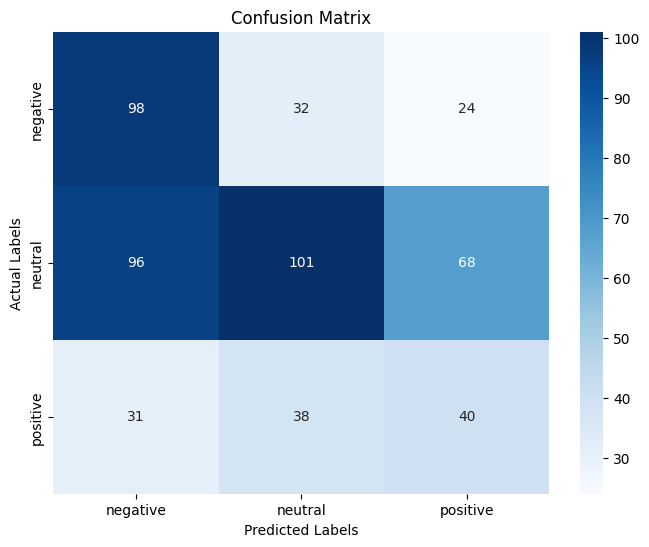

[2025-06-03 20:42:37,713][3446969155.py][line:46][INFO] Test UA: 0.4614893962998516
[2025-06-03 20:42:37,714][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:37,717][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative        98       32        24
neutral         96      101        68
positive        31       38        40
[2025-06-03 20:42:37,734][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:37,735][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.44      0.64      0.52       154
     neutral       0.59      0.38      0.46       265
    positive       0.30      0.37      0.33       109

    accuracy                           0.45       528
   macro avg       0.44      0.46      0.44       528
weighted avg       0.49      0.45      0.45       528

[2025-06-03 20:42:37,748][3446969155.py][line:68][INFO] Positive Recall:   0.3669724770642202
[2025-06-03 20:42:37,7

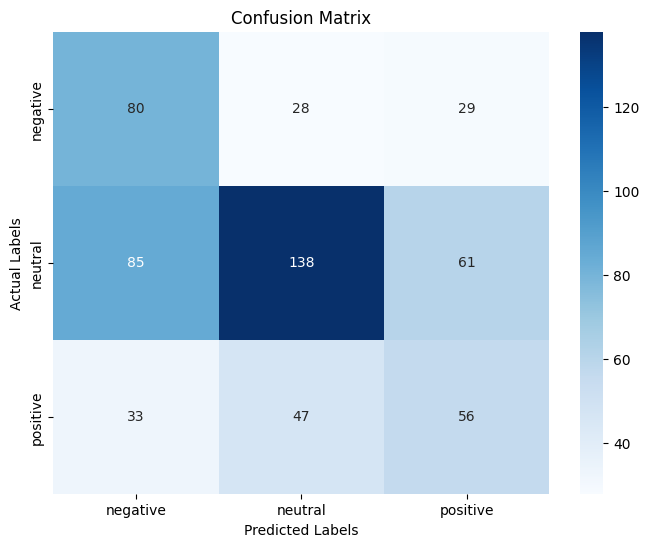

[2025-06-03 20:42:37,897][3446969155.py][line:46][INFO] Test UA: 0.49387393489317183
[2025-06-03 20:42:37,898][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:37,900][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative        80       28        29
neutral         85      138        61
positive        33       47        56
[2025-06-03 20:42:37,915][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:37,916][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.40      0.58      0.48       137
     neutral       0.65      0.49      0.56       284
    positive       0.38      0.41      0.40       136

    accuracy                           0.49       557
   macro avg       0.48      0.49      0.48       557
weighted avg       0.52      0.49      0.50       557

[2025-06-03 20:42:37,929][3446969155.py][line:68][INFO] Positive Recall:   0.4117647058823529
[2025-06-03 20:42:37,

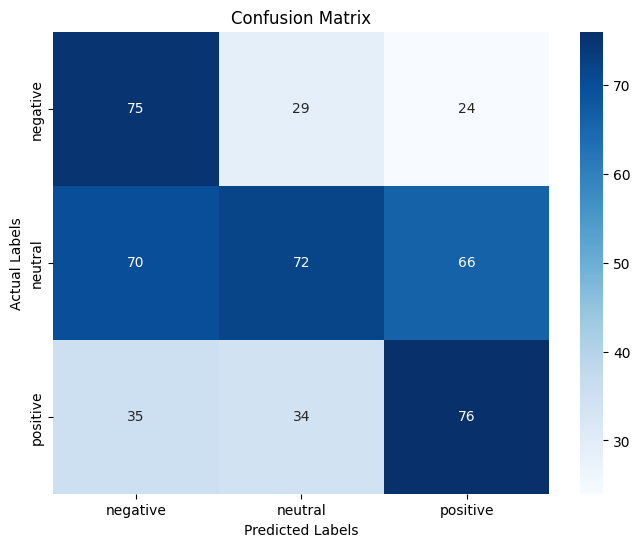

[2025-06-03 20:42:38,067][3446969155.py][line:46][INFO] Test UA: 0.48540975906277634
[2025-06-03 20:42:38,068][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:38,070][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative        75       29        24
neutral         70       72        66
positive        35       34        76
[2025-06-03 20:42:38,083][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:38,084][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.42      0.59      0.49       128
     neutral       0.53      0.35      0.42       208
    positive       0.46      0.52      0.49       145

    accuracy                           0.46       481
   macro avg       0.47      0.49      0.47       481
weighted avg       0.48      0.46      0.46       481

[2025-06-03 20:42:38,098][3446969155.py][line:68][INFO] Positive Recall:   0.5241379310344828
[2025-06-03 20:42:38,

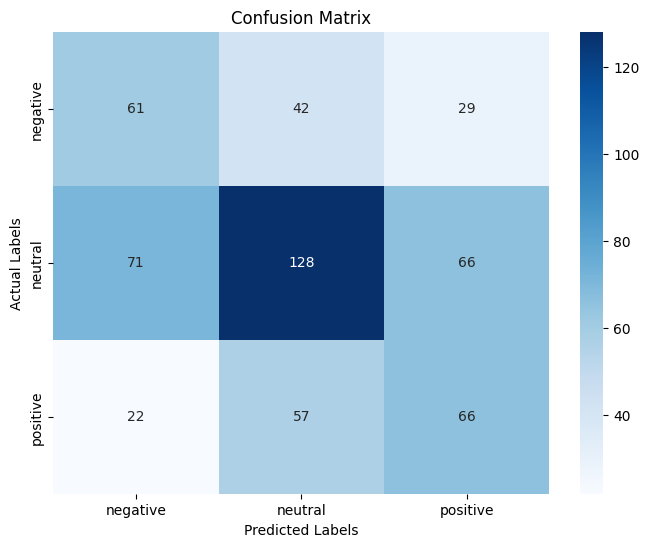

[2025-06-03 20:42:38,245][3446969155.py][line:46][INFO] Test UA: 0.4667708312796146
[2025-06-03 20:42:38,245][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:38,247][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative        61       42        29
neutral         71      128        66
positive        22       57        66
[2025-06-03 20:42:38,261][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:38,262][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.40      0.46      0.43       132
     neutral       0.56      0.48      0.52       265
    positive       0.41      0.46      0.43       145

    accuracy                           0.47       542
   macro avg       0.46      0.47      0.46       542
weighted avg       0.48      0.47      0.47       542

[2025-06-03 20:42:38,276][3446969155.py][line:68][INFO] Positive Recall:   0.45517241379310347
[2025-06-03 20:42:38,

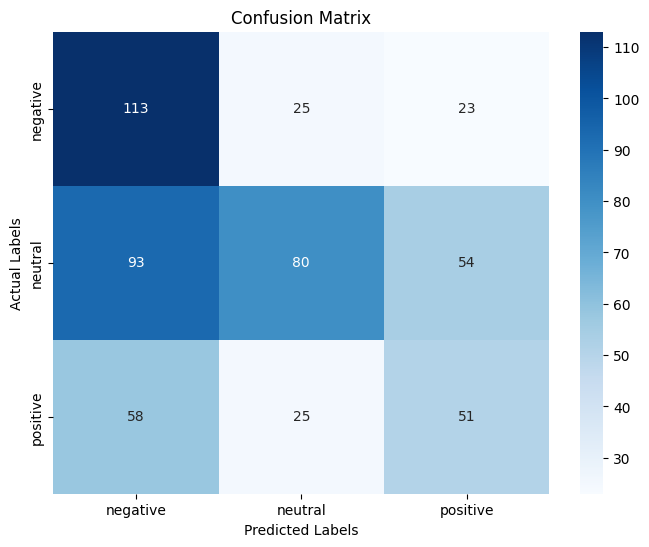

[2025-06-03 20:42:38,435][3446969155.py][line:46][INFO] Test UA: 0.4782944254838757
[2025-06-03 20:42:38,435][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:38,437][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       113       25        23
neutral         93       80        54
positive        58       25        51
[2025-06-03 20:42:38,452][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:38,453][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.43      0.70      0.53       161
     neutral       0.62      0.35      0.45       227
    positive       0.40      0.38      0.39       134

    accuracy                           0.47       522
   macro avg       0.48      0.48      0.46       522
weighted avg       0.50      0.47      0.46       522

[2025-06-03 20:42:38,466][3446969155.py][line:68][INFO] Positive Recall:   0.3805970149253731
[2025-06-03 20:42:38,4

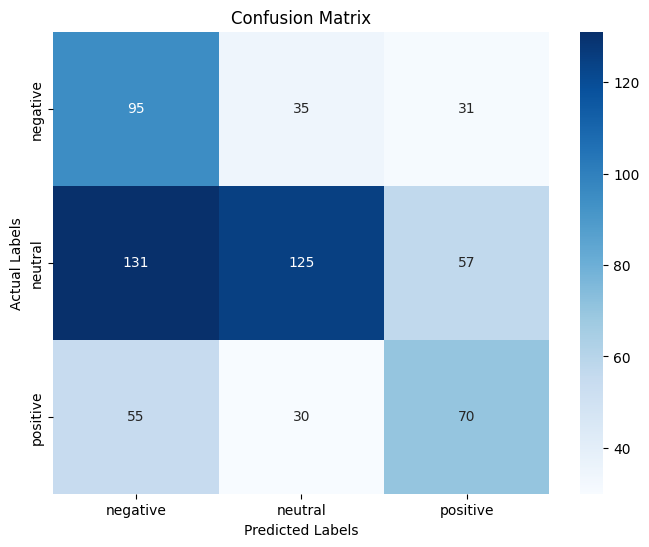

[2025-06-03 20:42:38,612][3446969155.py][line:46][INFO] Test UA: 0.4803453457970887
[2025-06-03 20:42:38,613][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:38,615][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative        95       35        31
neutral        131      125        57
positive        55       30        70
[2025-06-03 20:42:38,630][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:38,631][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.34      0.59      0.43       161
     neutral       0.66      0.40      0.50       313
    positive       0.44      0.45      0.45       155

    accuracy                           0.46       629
   macro avg       0.48      0.48      0.46       629
weighted avg       0.52      0.46      0.47       629

[2025-06-03 20:42:38,645][3446969155.py][line:68][INFO] Positive Recall:   0.45161290322580644
[2025-06-03 20:42:38,

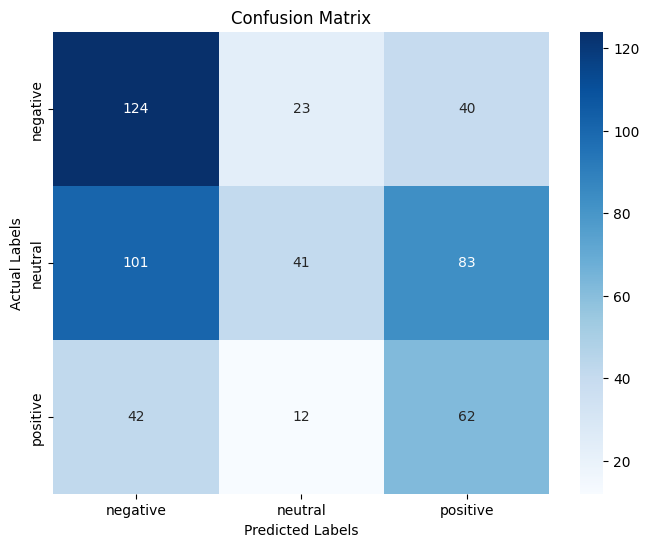

[2025-06-03 20:42:38,789][3446969155.py][line:46][INFO] Test UA: 0.4599355283736622
[2025-06-03 20:42:38,790][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:38,792][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       124       23        40
neutral        101       41        83
positive        42       12        62
[2025-06-03 20:42:38,806][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:38,807][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.46      0.66      0.55       187
     neutral       0.54      0.18      0.27       225
    positive       0.34      0.53      0.41       116

    accuracy                           0.43       528
   macro avg       0.45      0.46      0.41       528
weighted avg       0.47      0.43      0.40       528

[2025-06-03 20:42:38,821][3446969155.py][line:68][INFO] Positive Recall:   0.5344827586206896
[2025-06-03 20:42:38,8

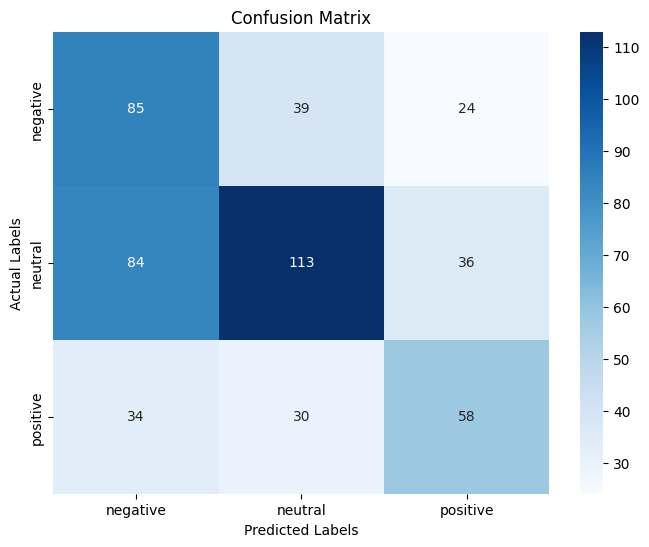

[2025-06-03 20:42:38,975][3446969155.py][line:46][INFO] Test UA: 0.5115709003874768
[2025-06-03 20:42:38,976][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:38,978][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative        85       39        24
neutral         84      113        36
positive        34       30        58
[2025-06-03 20:42:38,992][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:38,993][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.42      0.57      0.48       148
     neutral       0.62      0.48      0.54       233
    positive       0.49      0.48      0.48       122

    accuracy                           0.51       503
   macro avg       0.51      0.51      0.50       503
weighted avg       0.53      0.51      0.51       503

[2025-06-03 20:42:39,006][3446969155.py][line:68][INFO] Positive Recall:   0.47540983606557374
[2025-06-03 20:42:39,

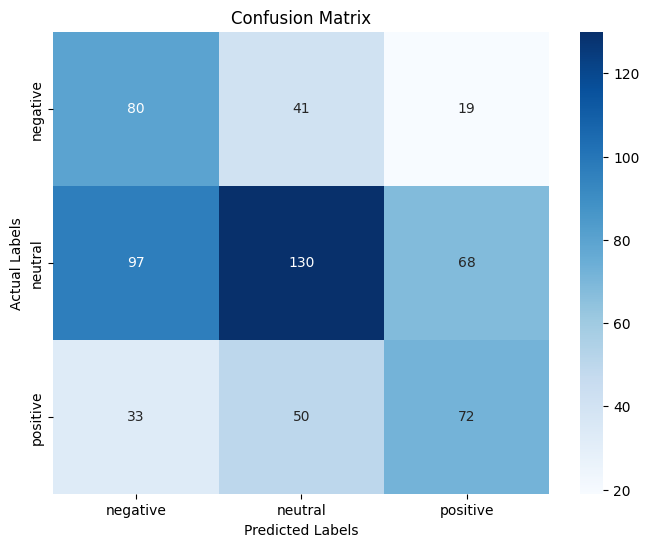

[2025-06-03 20:42:39,148][3446969155.py][line:46][INFO] Test UA: 0.49220755552084144
[2025-06-03 20:42:39,149][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:39,151][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative        80       41        19
neutral         97      130        68
positive        33       50        72
[2025-06-03 20:42:39,166][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:39,167][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.38      0.57      0.46       140
     neutral       0.59      0.44      0.50       295
    positive       0.45      0.46      0.46       155

    accuracy                           0.48       590
   macro avg       0.47      0.49      0.47       590
weighted avg       0.50      0.48      0.48       590

[2025-06-03 20:42:39,181][3446969155.py][line:68][INFO] Positive Recall:   0.4645161290322581
[2025-06-03 20:42:39,

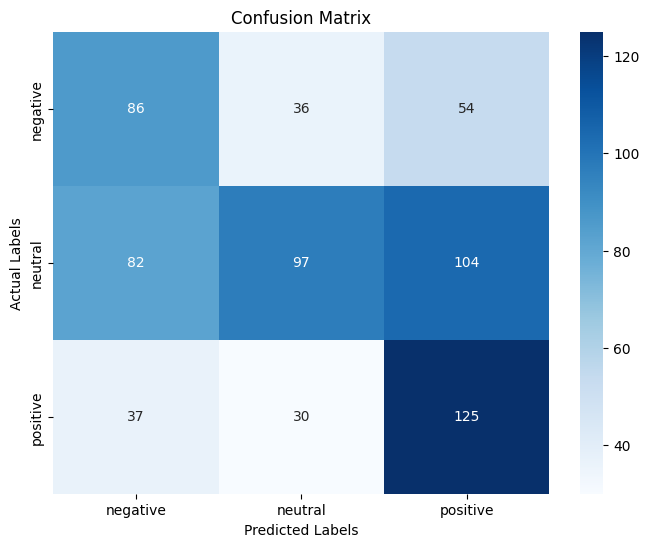

[2025-06-03 20:42:39,328][3446969155.py][line:46][INFO] Test UA: 0.49414473801620445
[2025-06-03 20:42:39,329][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:39,331][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative        86       36        54
neutral         82       97       104
positive        37       30       125
[2025-06-03 20:42:39,347][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:39,348][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.42      0.49      0.45       176
     neutral       0.60      0.34      0.43       283
    positive       0.44      0.65      0.53       192

    accuracy                           0.47       651
   macro avg       0.49      0.49      0.47       651
weighted avg       0.50      0.47      0.47       651

[2025-06-03 20:42:39,363][3446969155.py][line:68][INFO] Positive Recall:   0.6510416666666666
[2025-06-03 20:42:39,

In [6]:
for i in range(10):
    df = pd.read_csv(f"fold_{i}/predictions.csv")    
    calculate_accuracy(df, i)

## Calculate Per-Class averages

In [7]:
# Compute average recall for each class over 10 folds
average_positive_recall = sum(all_positive_accuracy) / 10
average_neutral_recall = sum(all_neutral_accuracy) / 10
average_negative_recall = sum(all_negative_accuracy) / 10

# Compute average F1-score for each class over 10 folds
average_positive_f1 = sum(all_positive_f1) / 10
average_neutral_f1 = sum(all_neutral_f1) / 10
average_negative_f1 = sum(all_negative_f1) / 10

# Compute overall (macro) averages across classes
overall_average_recall = (
    average_positive_recall + average_neutral_recall + average_negative_recall
) / 3
overall_average_f1 = (
    average_positive_f1 + average_neutral_f1 + average_negative_f1
) / 3

# Log the averages
logger.info(f"")
logger.info(f"------------------------ Averages ------------------------")
logger.info(f"Average Positive Recall: {average_positive_recall:.4f}")
logger.info(f"Average Neutral Recall: {average_neutral_recall:.4f}")
logger.info(f"Average Negative Recall: {average_negative_recall:.4f}")
logger.info(f"Macro Average Recall: {overall_average_recall:.4f}")
logger.info(f"")
logger.info(f"Average Positive F1-score: {average_positive_f1:.4f}")
logger.info(f"Average Neutral F1-score: {average_neutral_f1:.4f}")
logger.info(f"Average Negative F1-score: {average_negative_f1:.4f}")
logger.info(f"Macro Average F1-score: {overall_average_f1:.4f}")

[2025-06-03 20:42:39,374][1524251518.py][line:20][INFO] 
[2025-06-03 20:42:39,375][1524251518.py][line:21][INFO] ------------------------ Averages ------------------------
[2025-06-03 20:42:39,375][1524251518.py][line:22][INFO] Average Positive Recall: 0.4716
[2025-06-03 20:42:39,376][1524251518.py][line:23][INFO] Average Neutral Recall: 0.3899
[2025-06-03 20:42:39,377][1524251518.py][line:24][INFO] Average Negative Recall: 0.5858
[2025-06-03 20:42:39,378][1524251518.py][line:25][INFO] Macro Average Recall: 0.4824
[2025-06-03 20:42:39,379][1524251518.py][line:26][INFO] 
[2025-06-03 20:42:39,380][1524251518.py][line:27][INFO] Average Positive F1-score: 0.4366
[2025-06-03 20:42:39,381][1524251518.py][line:28][INFO] Average Neutral F1-score: 0.4660
[2025-06-03 20:42:39,382][1524251518.py][line:29][INFO] Average Negative F1-score: 0.4809
[2025-06-03 20:42:39,383][1524251518.py][line:30][INFO] Macro Average F1-score: 0.4612
